In [1]:
import environment.Qsim as Qsim
from environment.Qenv_unitary import Qenv_unitary_gym
from environment.Qenv_state import Qenv_state_gym
from environment.Qenv_state_ising import Qenv_ising_state_gym

Device to run the code, it can be:
- 'cpu': to run in computer
- 'cuda': to run in GPU
- None: will run in GPU is is available

In [2]:
device = 'cpu'

# Test Qsim

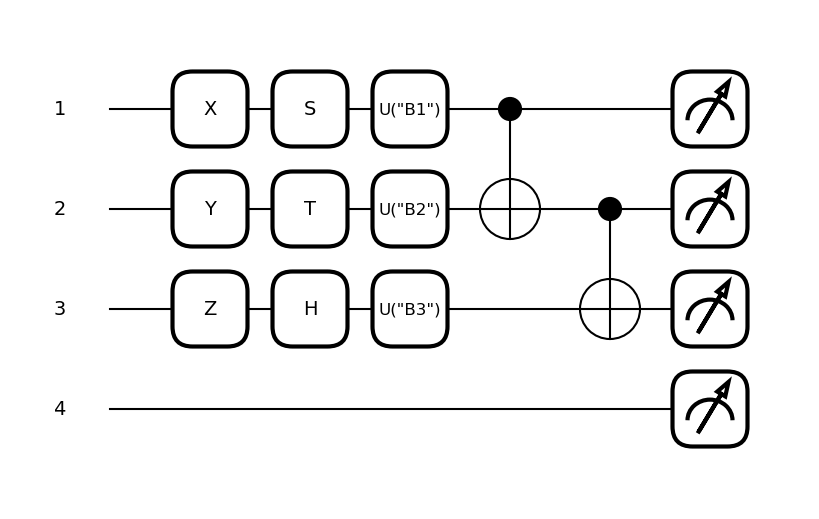

(0.5+0.2j)|0000> + (0.0+0.0j)|0001> + (-0.2-0.5j)|0010> + (0.0+0.0j)|0011> + (-0.1-0.3j)|0100> + (0.0+0.0j)|0101> + (0.3+0.1j)|0110> + (0.0+0.0j)|0111> + (0.0-0.1j)|1000> + (0.0+0.0j)|1001> + (-0.1+0.0j)|1010> + (0.0+0.0j)|1011> + (-0.3+0.1j)|1100> + (0.0+0.0j)|1101> + (0.1-0.3j)|1110> + (0.0+0.0j)|1111> 


In [3]:
# Initialize Circuit
Qcomp = Qsim.Circuit(4, device=device)

# Pauli gates (They are they own inverse)
Qcomp.X(1)
Qcomp.Y(2)
Qcomp.Z(3)

# Clifford + T gates (They are they own inverse)
Qcomp.S(1)
Qcomp.T(2)
Qcomp.H(3)

# HRC gates
Qcomp.B1(1)
Qcomp.B2(2)
Qcomp.B3(3)

# contol gates
Qcomp.CNOT([1,2])
Qcomp.CNOT([2,3])

Qcomp.draw_circuit()
print(Qcomp.state_str())

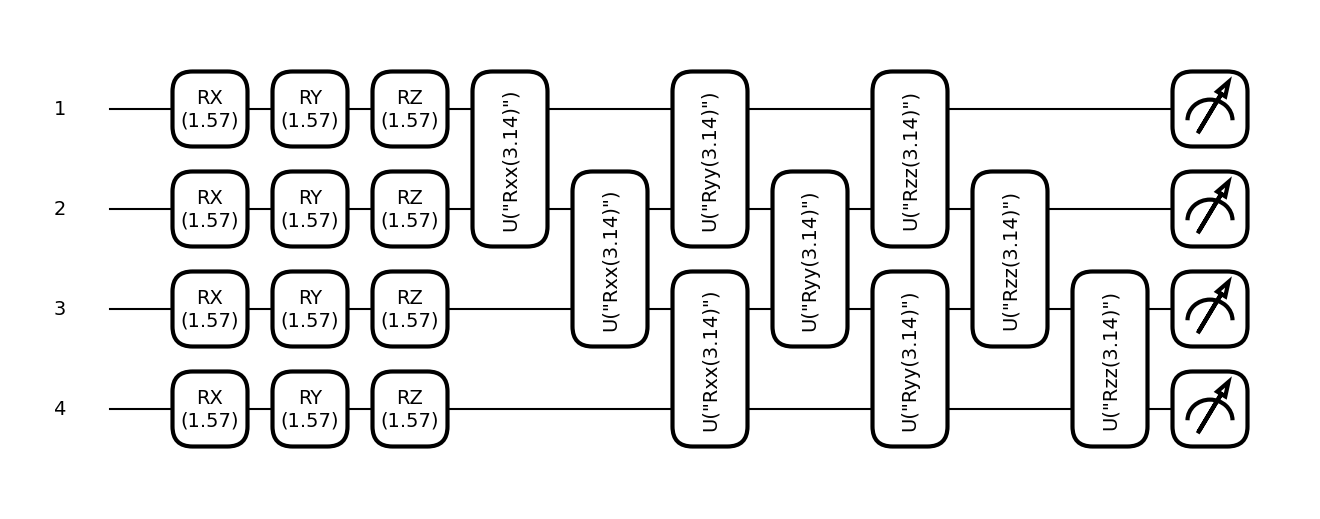

In [4]:
Qcomp.reset_circuit()
Qcomp.RX_global(1.567)
Qcomp.RY_global(1.567)
Qcomp.RZ_global(1.567)
Qcomp.RX_global_two(3.14)
Qcomp.RY_global_two(3.14)
Qcomp.RZ_global_two(3.14)
Qcomp.draw_circuit()

# Test Qenv_unitary

In [5]:
unitary_env = Qenv_unitary_gym(
                 N=2,
                 goals=None,
                 num_goals=-1,
                 max_steps=10, 
                 fidelity_threshold=0.99,
                 fidelity_function='Haar_integral',
                 sparse_reward=False,
                 qgates='HRC',
                 adjoint=False,
                 qubit_connectivity=None,
                 device=device)

In [6]:
print("Unitary environment Information:")
print("     Simulation running in:", unitary_env.device)
print("     Action space: ", unitary_env.action_space)
print("     Observation space: ", unitary_env.observation_space)
print("     Available gates:", unitary_env.explicit_actions)

Unitary environment Information:
     Simulation running in: cpu
     Action space:  Discrete(8)
     Observation space:  Box(-1.0, 1.0, (32,), float32)
     Available gates: [('B2', 1, False), ('B2', 2, False), ('B3', 1, False), ('B3', 2, False), ('B1', 1, False), ('B1', 2, False), ('CNOT', [1, 2], False), ('CNOT', [2, 1], False)]


In [7]:
obs, _ = unitary_env.reset()
observation, reward, done, truncated, info = unitary_env.step(2)
observation, reward, done, truncated, info = unitary_env.step(3)
observation, reward, done, truncated, info = unitary_env.step(5)

# Test Qenv_state

In [8]:
state_env = Qenv_state_gym(
                 N=2,
                 goals=None,
                 num_goals=-1,
                 max_steps=10, 
                 fidelity_threshold=0.99,
                 sparse_reward=False,
                 qgates='HRC',
                 adjoint=False,
                 inverse_circuit=False,
                 obs_type='Single',
                 qubit_connectivity=None,
                 device=device)

In [9]:
print("State environment Information:")
print("     Simulation running in:", state_env.device)
print("     Action space: ", state_env.action_space)
print("     Observation space: ", state_env.observation_space)
print("     Available gates:", state_env.explicit_actions)

State environment Information:
     Simulation running in: cpu
     Action space:  Discrete(8)
     Observation space:  Box(-1.0, 1.0, (8,), float32)
     Available gates: [('B2', 1, False), ('B2', 2, False), ('B3', 1, False), ('B3', 2, False), ('B1', 1, False), ('B1', 2, False), ('CNOT', [1, 2], False), ('CNOT', [2, 1], False)]


In [10]:
obs, _ = state_env.reset()
observation, reward, done, truncated, info = state_env.step(2)
observation, reward, done, truncated, info = state_env.step(3)
observation, reward, done, truncated, info = state_env.step(5)

# Test Qenv_ising

In [11]:
H, eigenvalues, eigenvectors = Qsim.Ising_Hamiltonian(N=2, J=1, gx=0, gz=0, device=device)
goal = eigenvectors[0]

ising_env = Qenv_ising_state_gym(
                 N = 2,
                 goal = goal,
                 starts = 'ground states',
                 num_starts = -1,
                 ground_states_params = dict(J = -1, gx = [1, 1.1], gz = 0),
                 delta_t = 6,
                 reward_function = 'log fidelity',
                 max_steps = 10,
                 fidelity_threshold = 0.95,
                 device = device)

In [12]:
print("Ising environment Information:")
print("     Simulation running in:", ising_env.device)
print("     Action space: ", ising_env.action_space)
print("     Observation space: ", ising_env.observation_space)
print("     Available gates:", ising_env.explicit_actions)

Ising environment Information:
     Simulation running in: cpu
     Action space:  Discrete(12)
     Observation space:  Box(-1.0, 1.0, (8,), float32)
     Available gates: [('RX_global', tensor(0.2618)), ('RX_global', tensor(-0.1848)), ('RY_global', tensor(0.2618)), ('RY_global', tensor(-0.1848)), ('RZ_global', tensor(0.2618)), ('RZ_global', tensor(-0.1848)), ('RX_global_two', tensor(0.2618)), ('RX_global_two', tensor(-0.1848)), ('RY_global_two', tensor(0.2618)), ('RY_global_two', tensor(-0.1848)), ('RZ_global_two', tensor(0.2618)), ('RZ_global_two', tensor(-0.1848))]


In [13]:
obs, _ = ising_env.reset()
observation, reward, done, truncated, info = ising_env.step(2)
observation, reward, done, truncated, info = ising_env.step(3)
observation, reward, done, truncated, info = ising_env.step(5)